### Ajuste de modelos

* A partir de las transformaciones propuestas ajustar distintos modelos (S)ARIMA. Extraer orden, parámetros, coeficientes numéricos y análisis de la bondad del modelo.
* Ajustar y predecir usando redes neuronales LSTM.
* Comparar con predicciones usando SARIMA y extraer conclusiones.
* **Realizar el análisis espectral de la serie original. Hallar las frecuencias principales y comparar con las componentes cíclica y estacional usando la descomposición.**

In [1]:
from utils import process_file
from imports import *


In [2]:
%matplotlib widget

In [3]:
warnings.filterwarnings("ignore")

#### Cargamos dataset ya preprocesado

In [4]:
bicis_data = process_file()
type(bicis_data)

pandas.core.series.Series

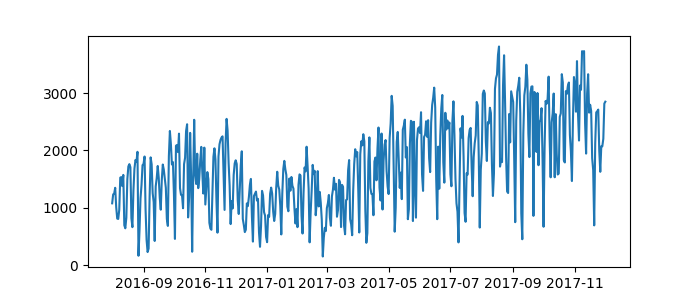

In [5]:
plt.figure(figsize=(7, 3))
plt.plot(bicis_data)

####  Periodograma sobre la serie original

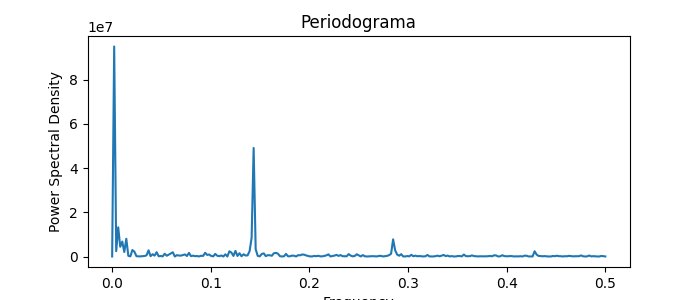

In [6]:
from scipy.signal import periodogram
frequencies, power_spectrum = periodogram(bicis_data)

plt.figure(figsize=(7, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodograma')
plt.show()

#### Periodograma sobre la serie diferenciada

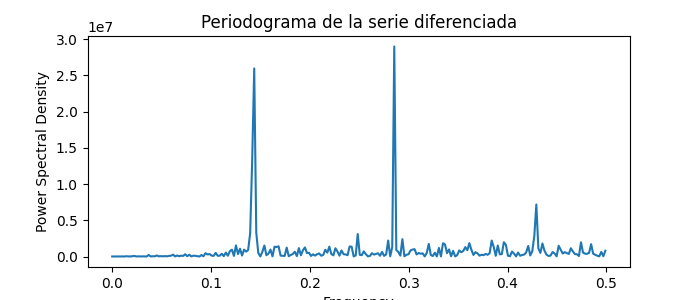

In [7]:
# Diferencio la serie y computo periodograma

fs = 1#.0
bicis_diff = bicis_data.diff().dropna()
frequencies, power_spectrum = periodogram(bicis_diff, fs)

plt.figure(figsize=(7, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodograma de la serie diferenciada')
plt.show()


#### Periodograma sobre la serie sin la tendencia (detrend)

In [8]:
from scipy.signal import detrend
detrended_data = detrend(bicis_data, type='linear')


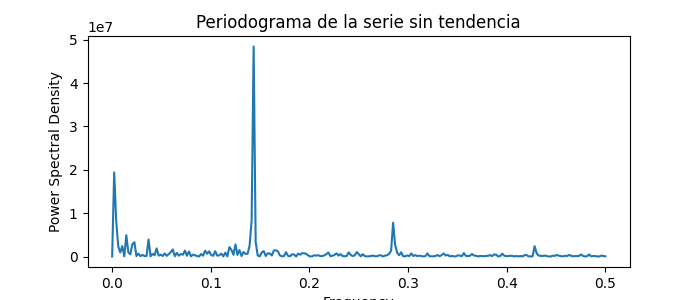

In [9]:

fs = 1
frequencies, power_spectrum = periodogram(detrended_data, fs)

plt.figure(figsize=(7, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodograma de la serie sin tendencia')
plt.show()

#### Observaciones

Se puede observar el piso de ruido y una componente marcada en la frecuencia 0.14 que puede interpretarse como la frecuencia semanal. 
Si consideramos que frecuencia = 1/periodo y como ya hemos visto en la PACF que el periodo es 7, tiene sentido que predomine el componente ciclico al haberle extraido la tendencia a la serie.


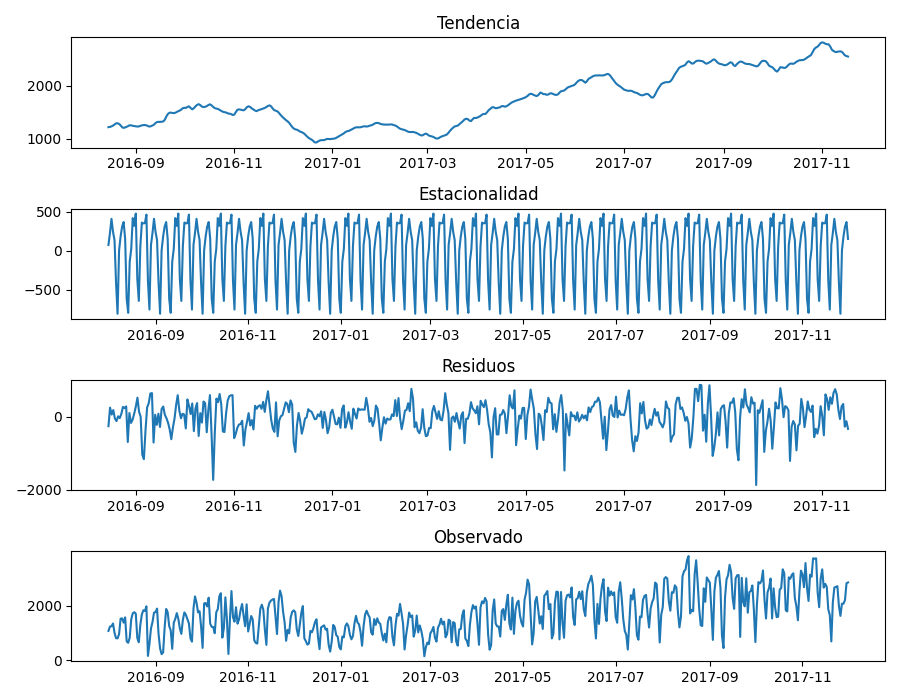

In [10]:
decomposition = seasonal_decompose(bicis_data, model='additive', period=28)

plt.figure(figsize=(9, 7))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Estacionalidad')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residuos')

plt.subplot(4, 1, 4)
plt.plot(decomposition.observed)
plt.title('Observado')

plt.tight_layout()
plt.show()